# Regression

## Boston Housing

In [86]:
import sklearn
import pandas as pd
import numpy as np
import sys

In [87]:
df = pd.read_csv('data/housing.data', delim_whitespace=True, header=None)

In [88]:
from sklearn.datasets import load_boston
boston = load_boston()
# boston.keys()
# print(boston.DESCR)
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200


In [89]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [90]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [91]:
df.columns = col_name

In [92]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


## Exploratory Data Analysis(EDA)

In [93]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


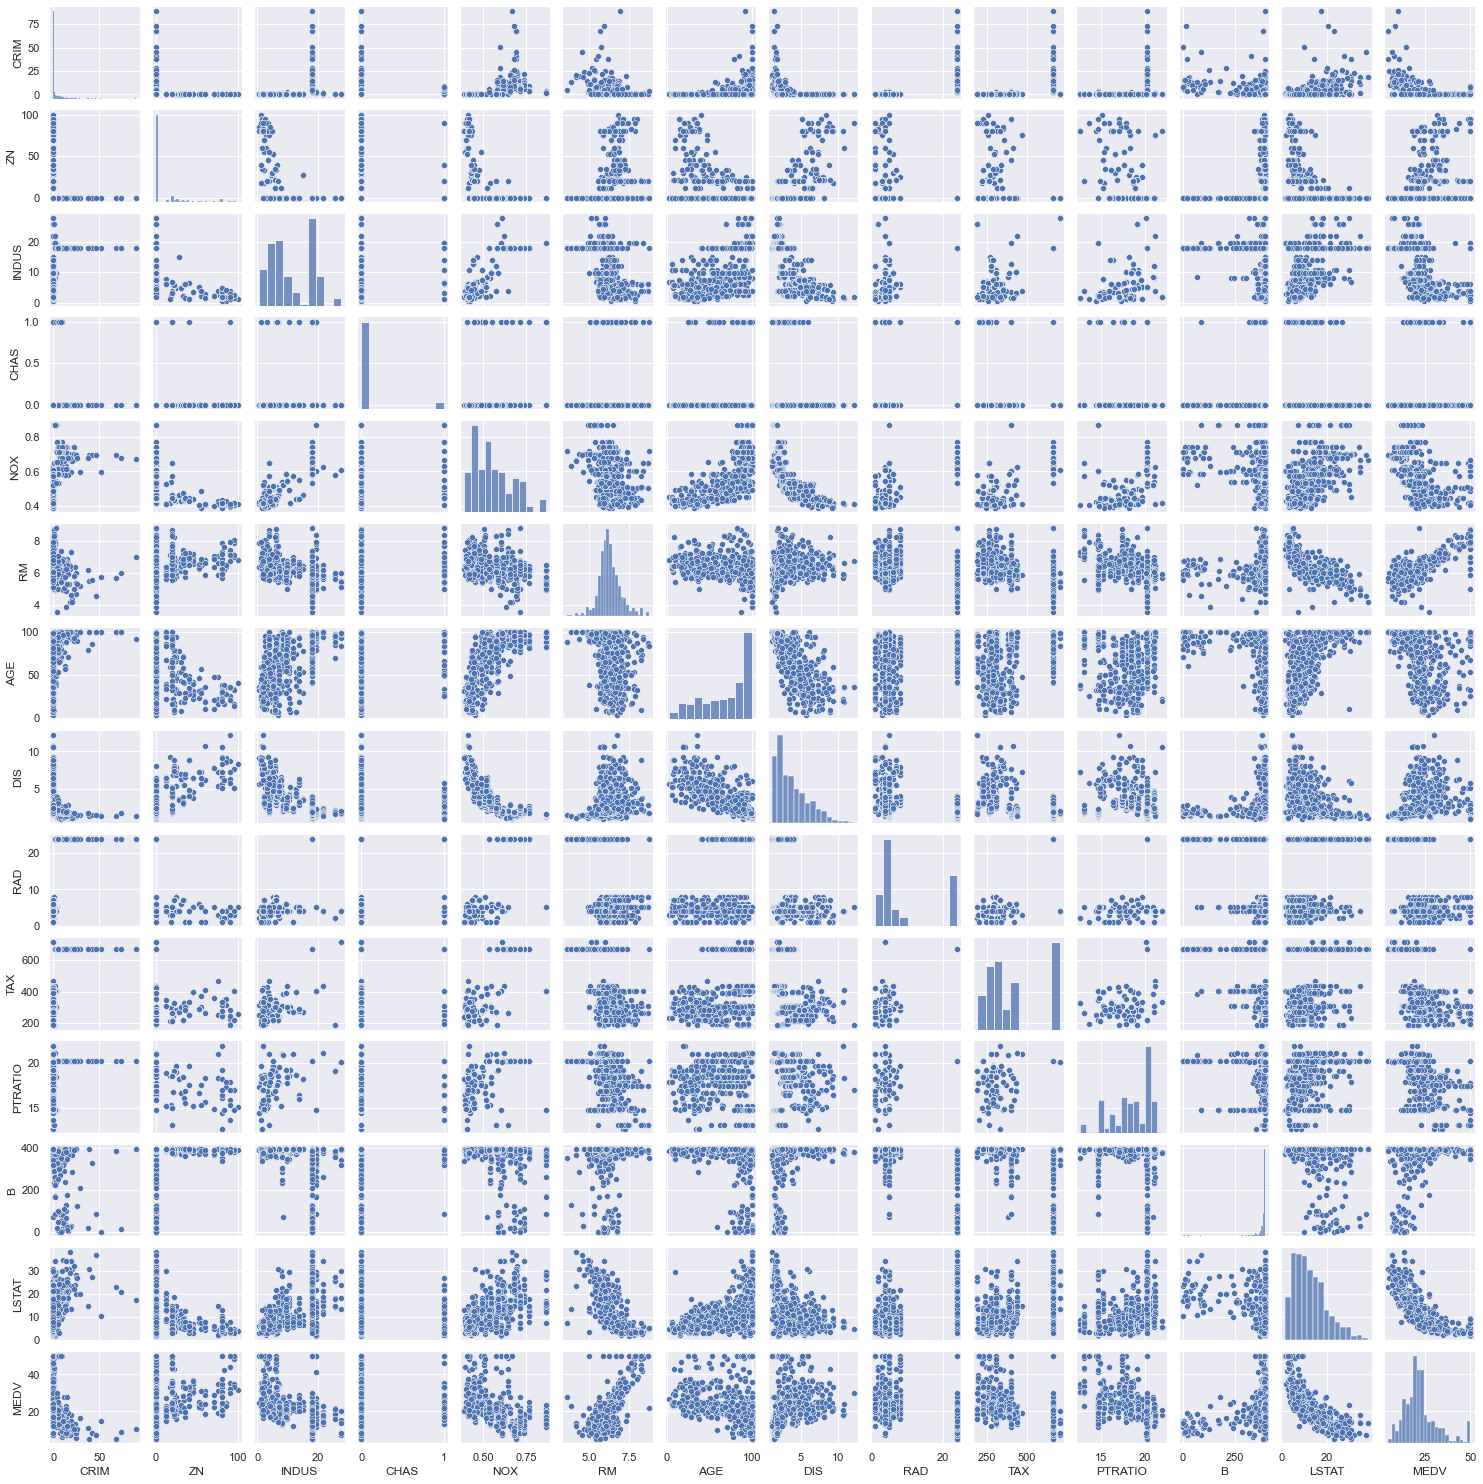

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
sns.pairplot(df, height=1.5)
plt.show()

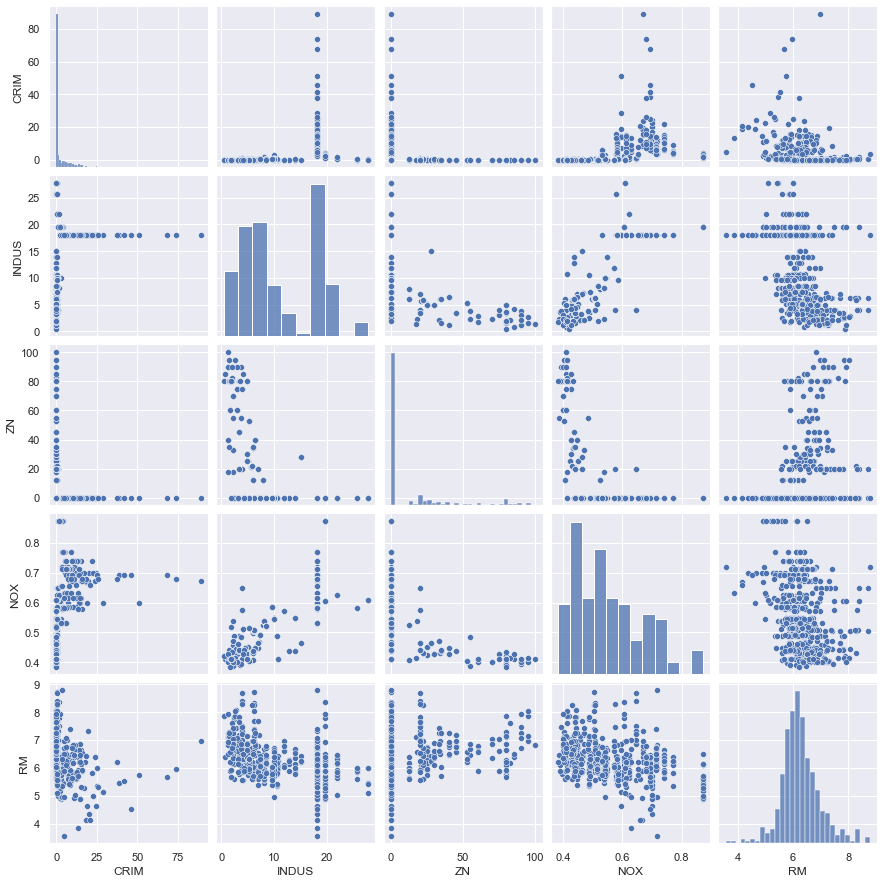

In [95]:
col_study = ['CRIM', 'INDUS', 'ZN', 'NOX', 'RM']
sns.pairplot(df[col_study], height=2.5)
plt.show()

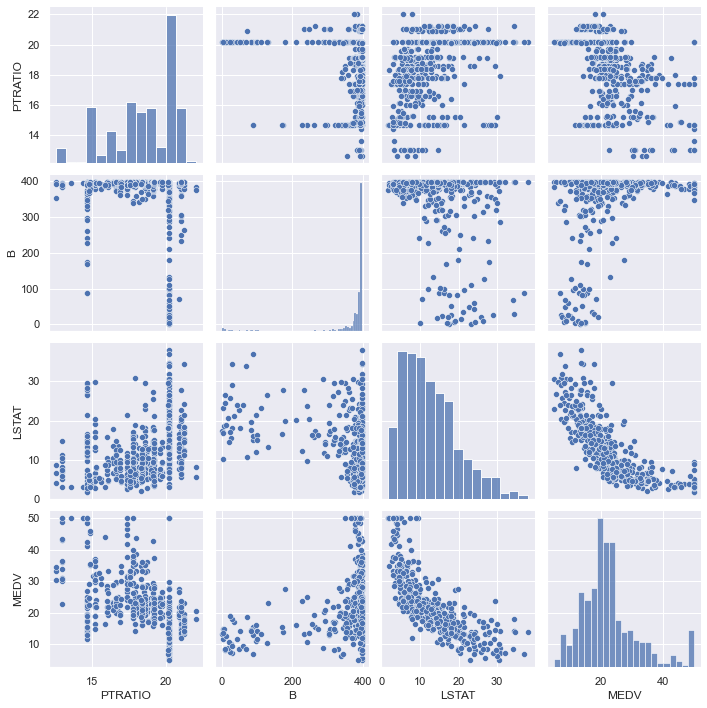

In [96]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[col_study], height=2.5)
plt.show()

## Correlation Analysis and Feature Selection

In [97]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


In [98]:
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


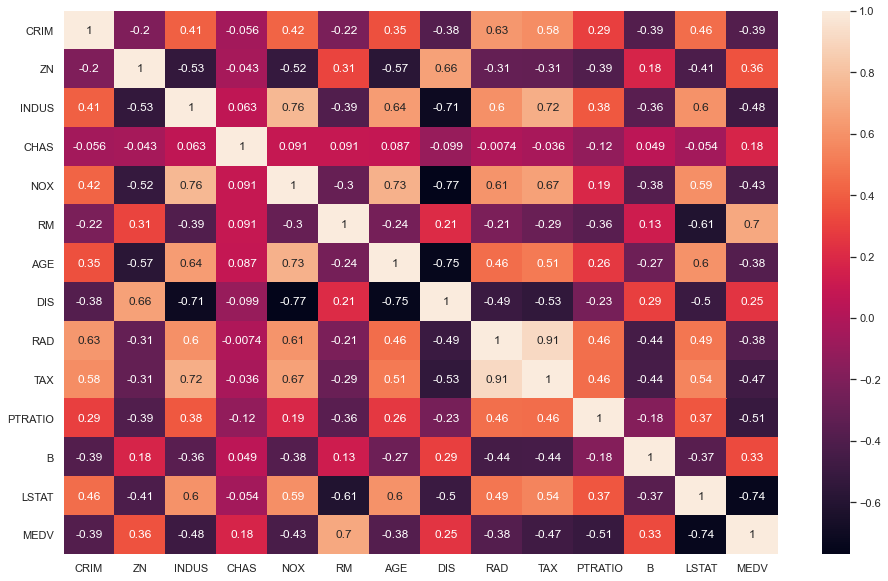

In [99]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

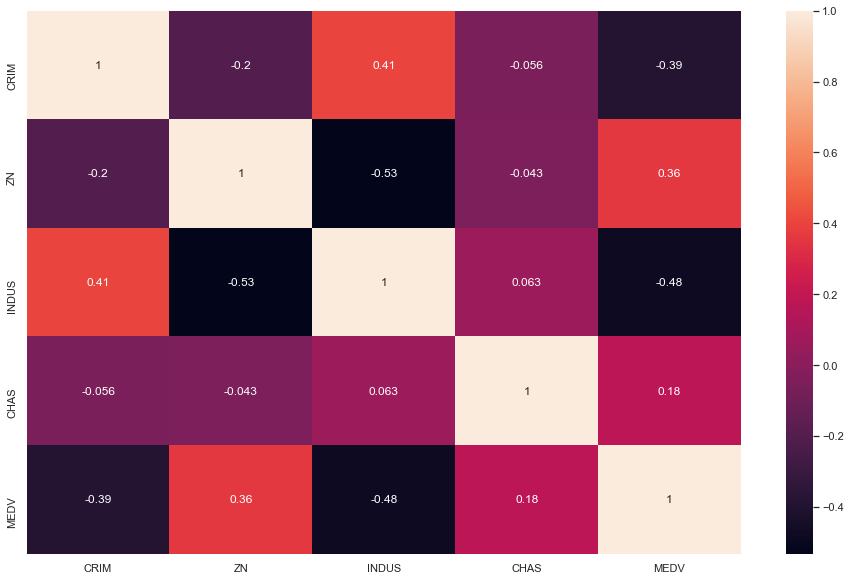

In [100]:
plt.figure(figsize=(16, 10))
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']
sns.heatmap(df[col_name].corr(), annot=True )
plt.show()

In [101]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

## Linear Regression using Scikit-Learn

In [102]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [104]:
model.fit(X, y)

LinearRegression()

In [105]:
model.coef_

array([9.10210898])

In [106]:
model.intercept_

-34.67062077643857

C:\Users\R_Hasan\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


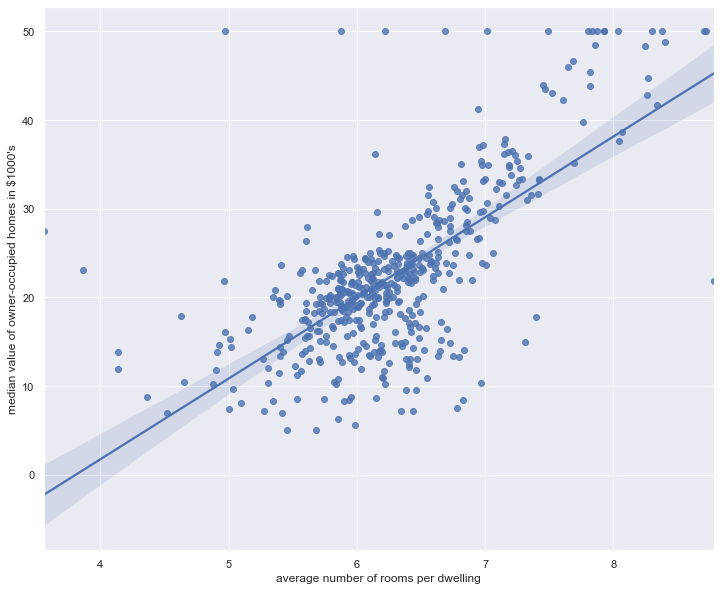

In [107]:
plt.figure(figsize=(12, 10))
sns.regplot(X, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("median value of owner-occupied homes in $1000's")
plt.show()

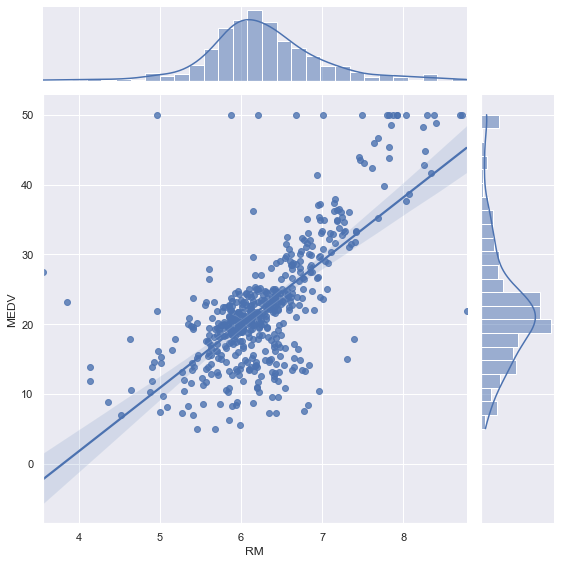

In [108]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8)

In [109]:
model.predict(np.array([5]).reshape(1, -1))

array([10.83992413])

<hr>

## Five Step

In [110]:
# Step 1: Selecting Model

# Step 2: Instantiate with parameter
ml_2 = LinearRegression()

#Step 3: Arrange data into a feature matrix and target vector
X = df['LSTAT'].values.reshape(-1, 1)
y = df['MEDV'].values

# Step 4: fit
ml_2.fit(X, y)

#Step 5: predict
ml_2.predict(np.array([10]).reshape(1, -1))

array([25.05334734])

C:\Users\R_Hasan\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


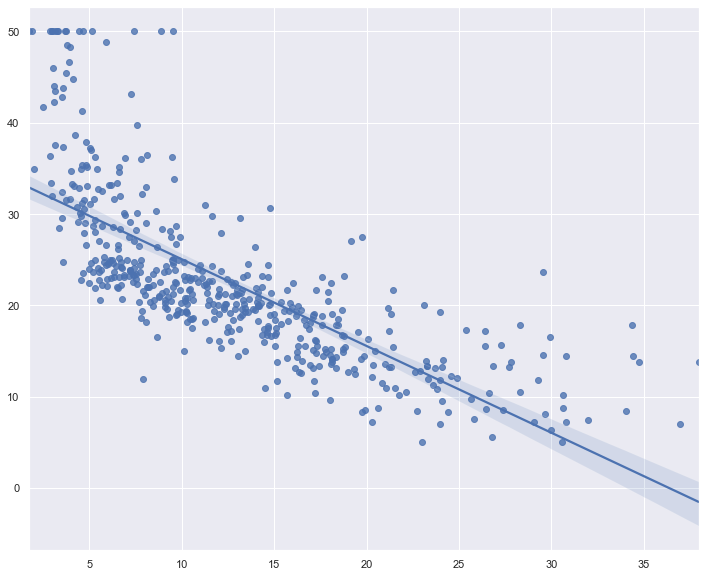

In [111]:
plt.figure(figsize=(12, 10))
sns.regplot(X, y)
plt.show()

## Robust Regression

### RANSAC Algorithm

In [112]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


In [113]:
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

In [114]:
from sklearn.linear_model import RANSACRegressor

In [115]:
ransac = RANSACRegressor()

In [116]:
ransac.fit(X, y)

RANSACRegressor()

In [117]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [118]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

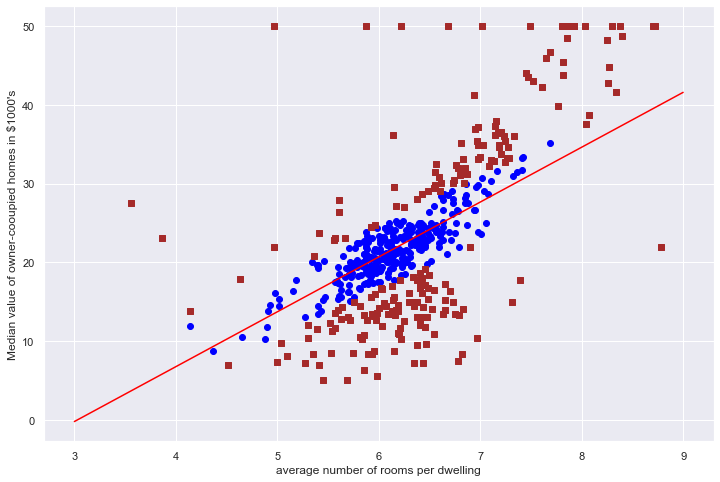

In [119]:
# Plotting
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],
           c='blue', marker='o', label='Inliners' )
plt.scatter(X[outlier_mask], y[outlier_mask],
           c='brown', marker='s', label='Outliners' )
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-cooupied homes in $1000's")
plt.show()

## Performance Evaluation of Regression Model

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression()

In [131]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [132]:
print(np.shape(y_train), np.shape(y))
print(np.shape(X_test))

(404,) (506,)
(102, 13)


### Method 1: Residual Analysis

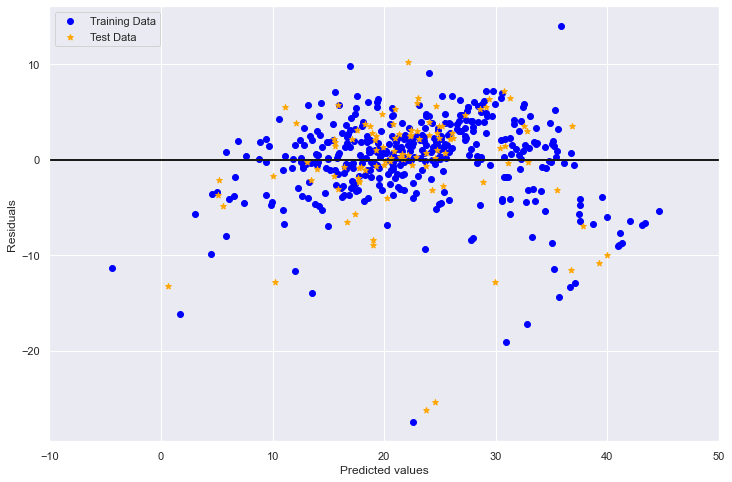

In [133]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

### Method 2: Mean Squared Error

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [136]:
mean_squared_error(y_test, y_test_pred)

33.448979997676474

### Method 3: Coefficient of Determination, $R^2$

In [140]:
from sklearn.metrics import r2_score

In [141]:
r2_score(y_test, y_test_pred)

0.5892223849182514

In [142]:
r2_score(y_train, y_train_pred)

0.7730135569264234

## What does a near perfect model look like?

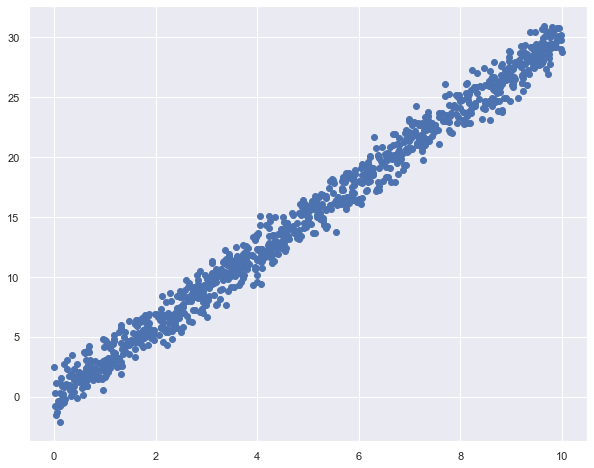

In [144]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [147]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [149]:
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

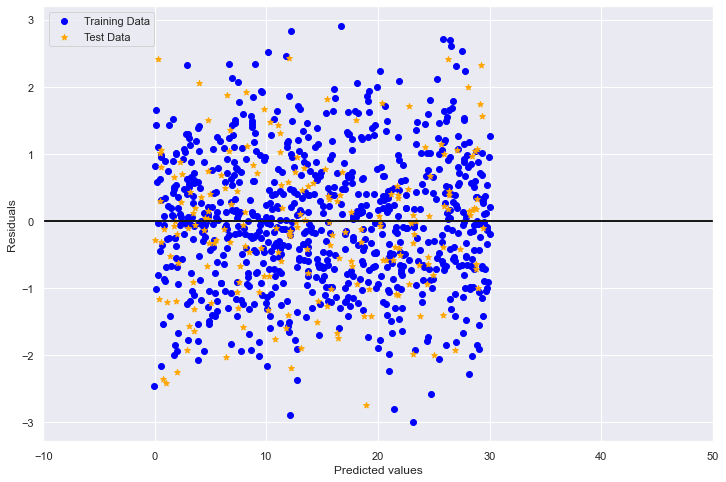

In [150]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

In [151]:
r2_score(y_train, y_train_pred)

0.9868659753000236